In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import joblib

In [2]:
data = pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
print(data.isnull().sum())

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [6]:
data = data.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,0.0,No


In [7]:
print(data.isnull().sum())

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


In [8]:
data['RainToday'] = data['RainToday'].map( {'No':0, 'Yes':1} ) 
data['RainTomorrow'] = data['RainTomorrow'].map( {'No':0, 'Yes':1} )

In [9]:
#Encoding categorical variables to integers
objs = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in objs:
    freq_order = data[column].value_counts().index
    mapping = {val: idx for idx, val in enumerate(freq_order)}
    data[column] = data[column].map(mapping)

In [10]:
data = data.dropna(subset=["RainTomorrow"])
data = data.drop(columns=['Date'])

In [11]:
missing_value_columns = data.columns[data.isnull().any()]

for column in missing_value_columns:
    #data[column].fillna(data[column].mean(), inplace=True) <-- gave some error hence used this (suggested by pandas)
    if column == 'RainToday':
        # Use mode (most frequent value) for binary categorical column
        # data[column].fillna(data[column].mode()[0], inplace=True)
        data.fillna({column: data[column].mode()[0]}, inplace=True)
    else:
        data.fillna({column: data[column].mean()}, inplace=True)
    
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

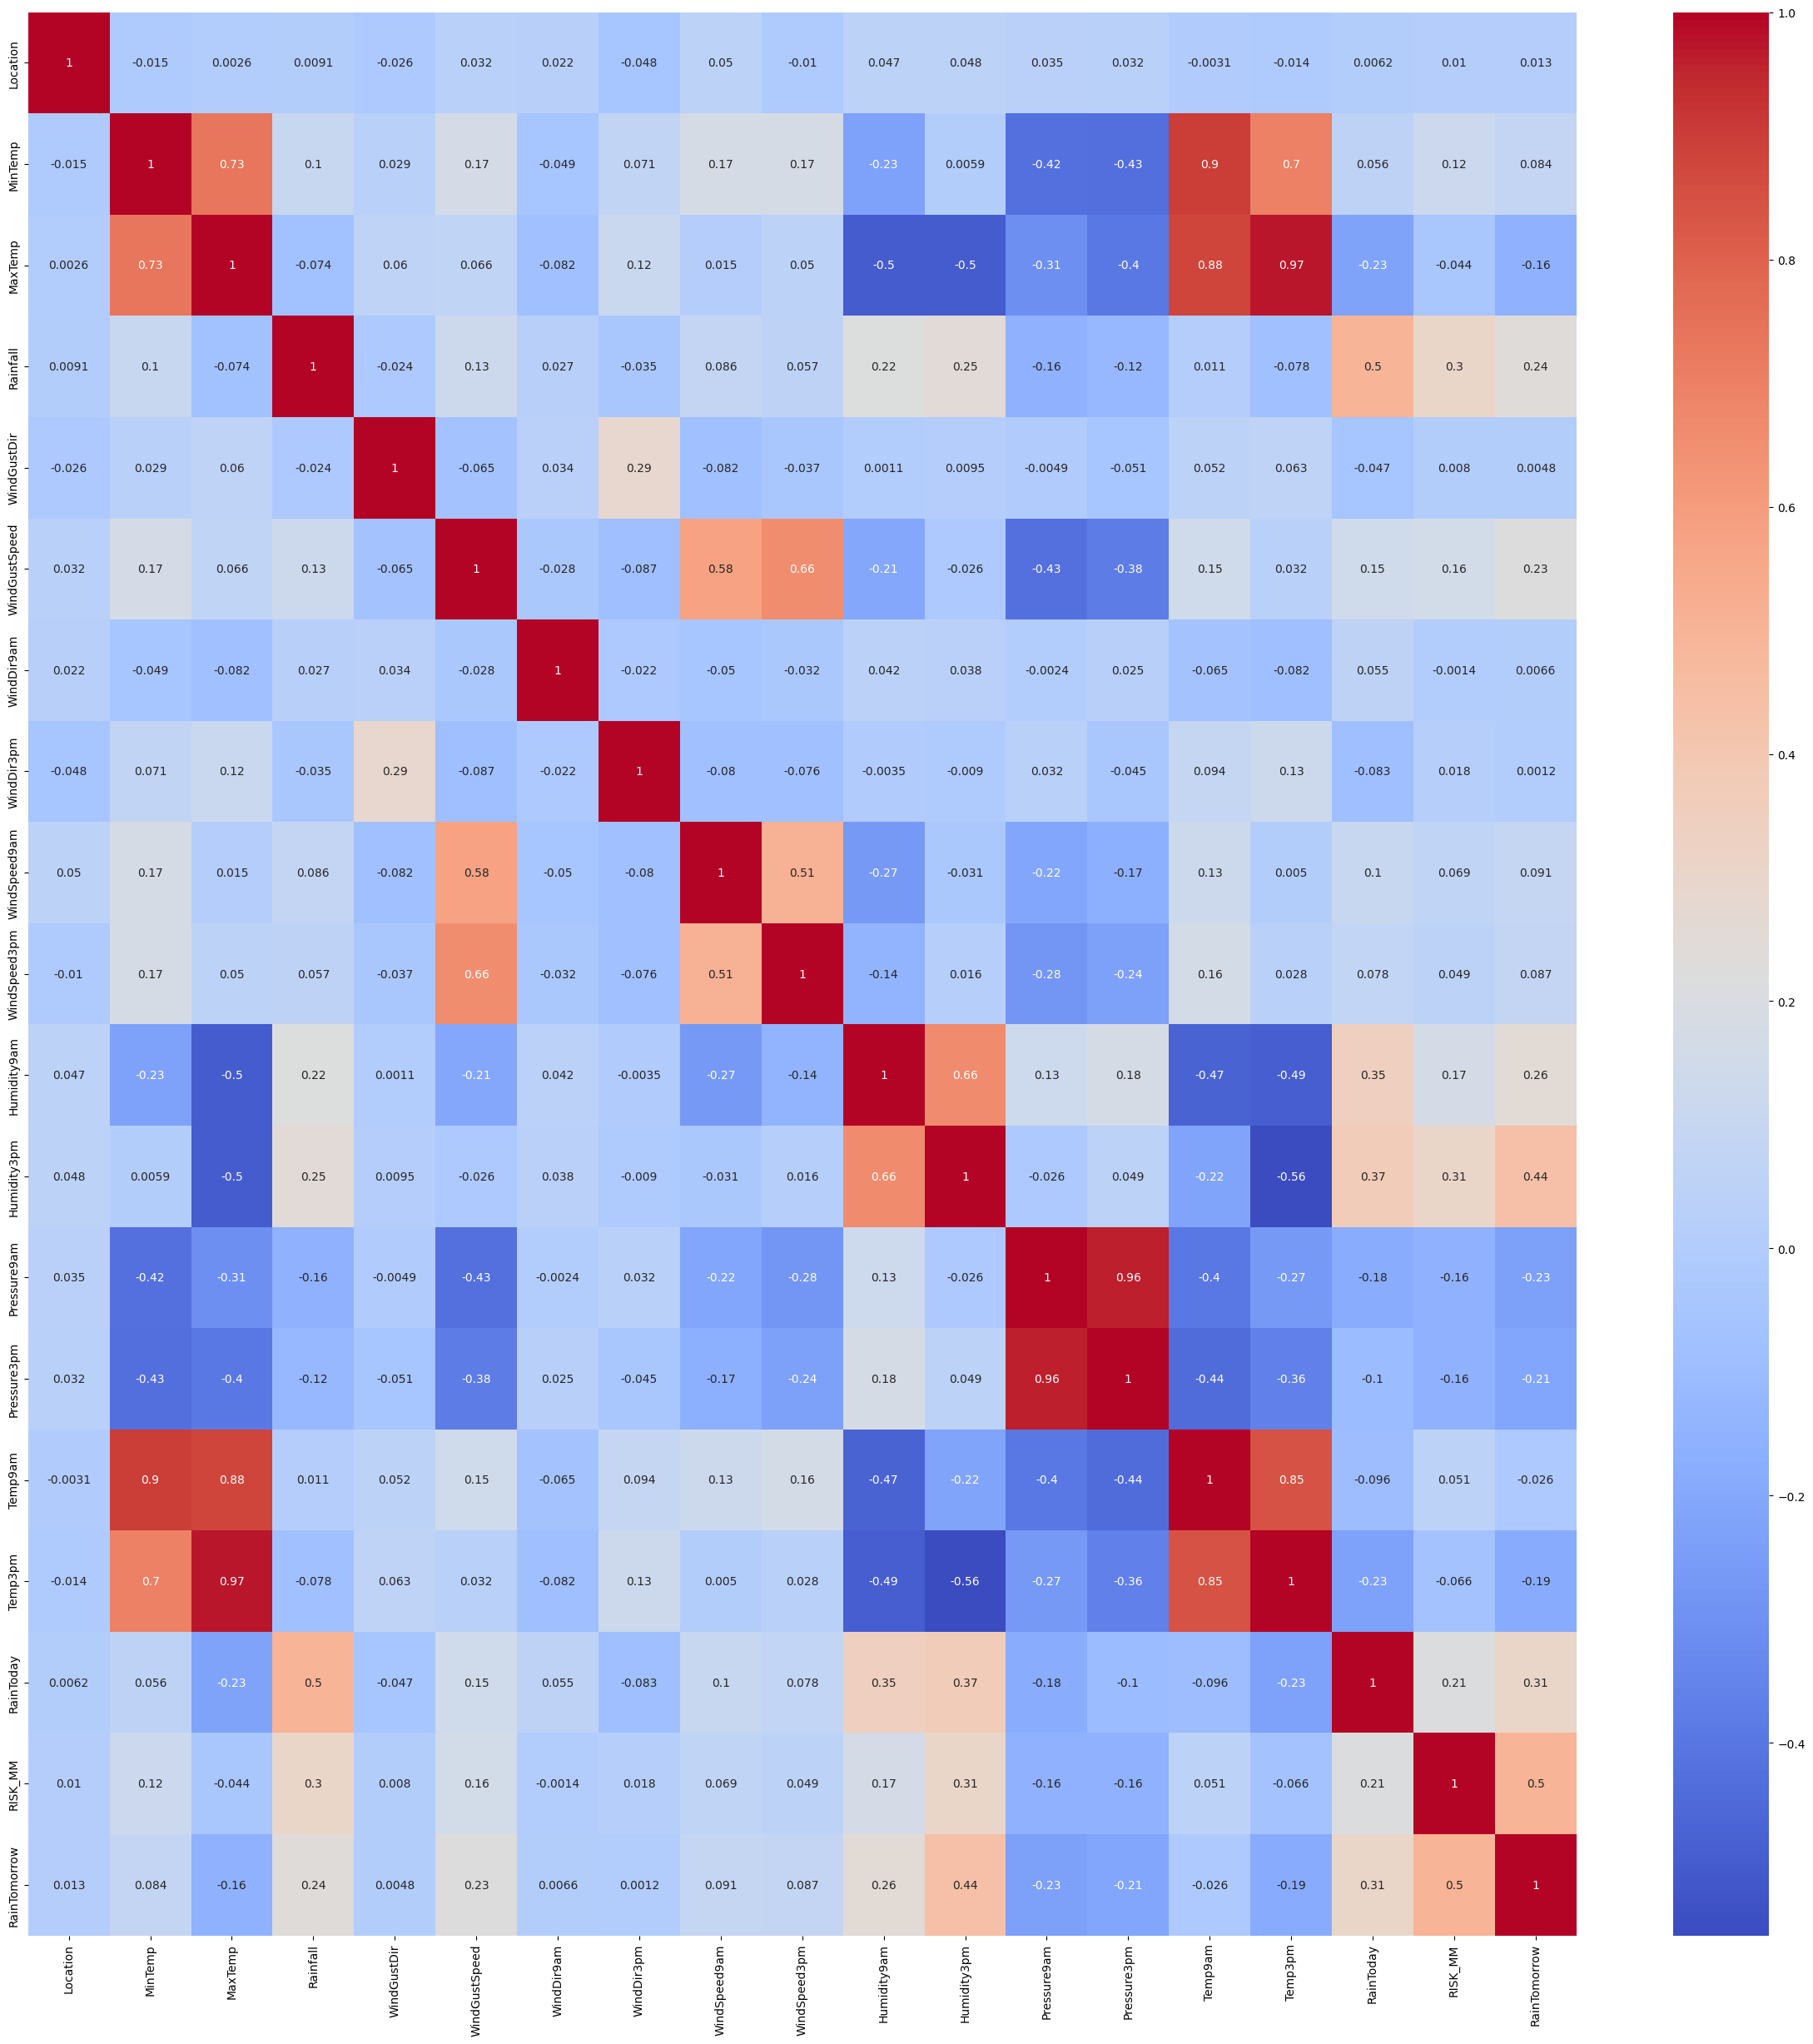

In [12]:
plt.figure(figsize=(30,30))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [13]:
# Showing Strong Correlation between Temp9am and MinTemp, Temp9am and MaxTemp, Pressure3pm and Pressure9am, and Temp3pm and MaxTemp, and Temp3pm and Temp9am
# Dropping the columns which are strongly correlated
data = data.drop(['Temp9am', 'Pressure3pm', 'Temp3pm'], axis = 1)

In [14]:
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RISK_MM,RainTomorrow
0,14,13.4,22.9,0.6,0.0,44.0,6.0,7.0,20.0,24.0,71.0,22.0,1007.7,0.0,0.0,0
1,14,7.4,25.1,0.0,9.0,44.0,9.0,3.0,4.0,22.0,44.0,25.0,1010.6,0.0,0.0,0
2,14,12.9,25.7,0.0,6.0,46.0,6.0,3.0,19.0,26.0,38.0,30.0,1007.6,0.0,0.0,0
3,14,9.2,28.0,0.0,13.0,24.0,1.0,10.0,11.0,9.0,45.0,16.0,1017.6,0.0,1.0,0
4,14,17.5,32.3,1.0,0.0,41.0,10.0,8.0,7.0,20.0,82.0,33.0,1010.8,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,48,3.5,21.8,0.0,2.0,31.0,11.0,10.0,15.0,13.0,59.0,27.0,1024.7,0.0,0.0,0
142189,48,2.8,23.4,0.0,2.0,31.0,1.0,14.0,13.0,11.0,51.0,24.0,1024.6,0.0,0.0,0
142190,48,3.6,25.3,0.0,14.0,22.0,1.0,6.0,13.0,9.0,56.0,21.0,1023.5,0.0,0.0,0
142191,48,5.4,26.9,0.0,3.0,37.0,1.0,7.0,9.0,9.0,53.0,24.0,1021.0,0.0,0.0,0


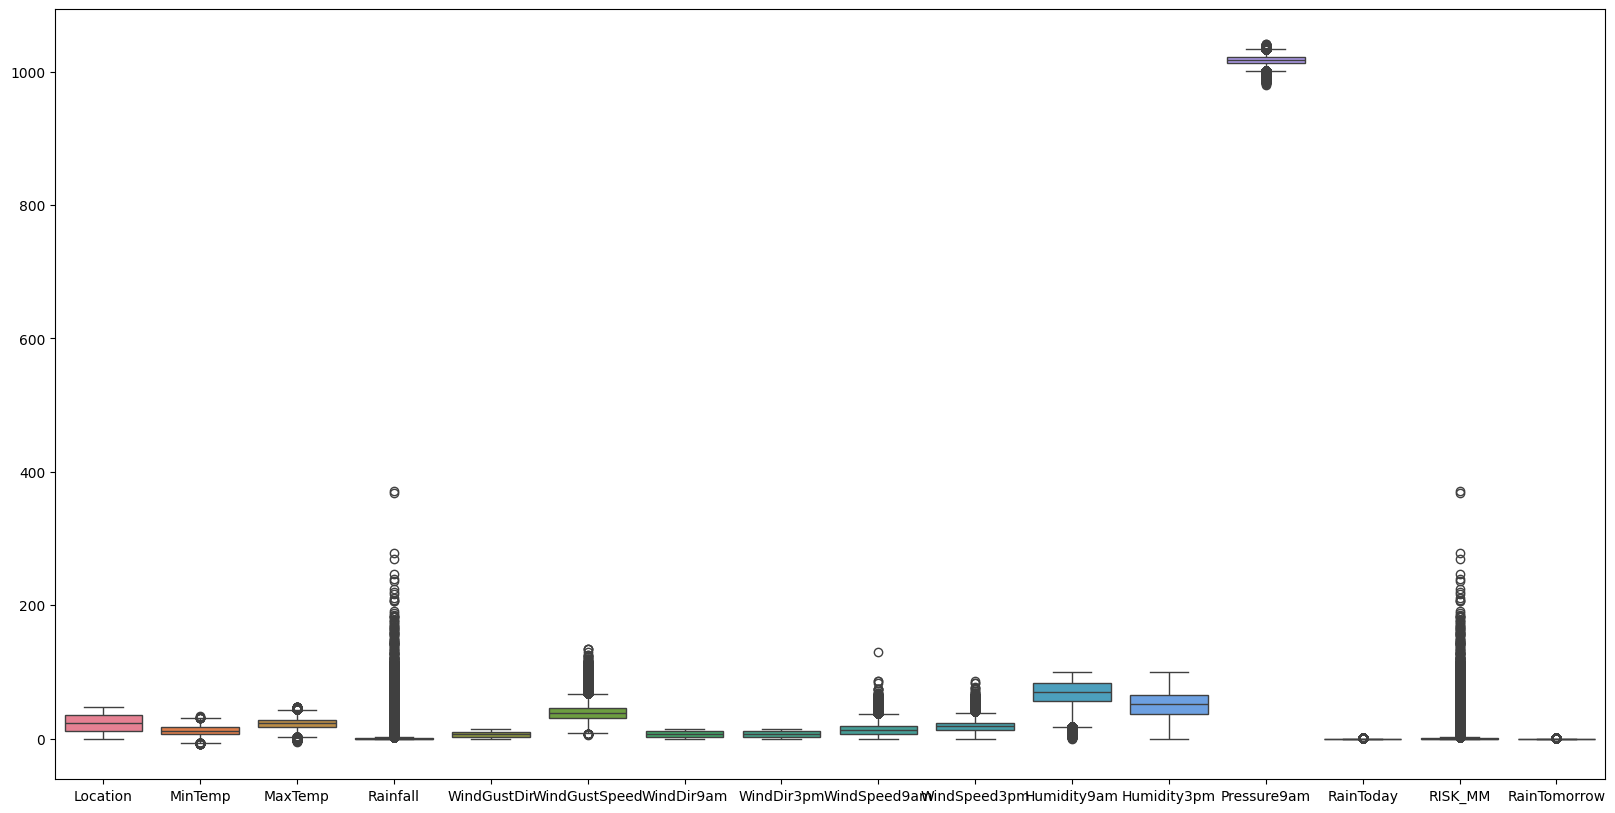

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

In [16]:
# Separate data by RainTomorrow class
rain = data[data['RainTomorrow'] == 1]
no_rain = data[data['RainTomorrow'] == 0]

# Outlier removal on majority class only
numeric_cols = no_rain.select_dtypes(include=np.number).columns
mask = pd.Series(True, index=no_rain.index)

for col in numeric_cols:
    Q1 = no_rain[col].quantile(0.25)
    Q3 = no_rain[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask &= no_rain[col].between(lower, upper)

# Apply mask to no_rain, keep all rain rows
no_rain_cleaned = no_rain[mask]

# Combine cleaned no_rain with full rain data
data = pd.concat([no_rain_cleaned, rain], ignore_index=True).reset_index(drop=True)

# Check class distribution after filtering
print(data['RainTomorrow'].value_counts(normalize=True))

RainTomorrow
0    0.695196
1    0.304804
Name: proportion, dtype: float64


In [17]:
# for col in data.columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [18]:
data = data.reset_index(drop=True)

y = data['RainTomorrow']
data = data.drop(columns=['RISK_MM', 'RainTomorrow'])

data = data.reset_index(drop=True)



In [19]:
X = data
mean = X.mean(axis=0)
std_dev = X.std(axis=0).replace(0, 1)
X = (X - mean) / std_dev
X 

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday
0,-0.625030,-0.765635,0.195900,-0.224459,0.431212,0.367558,0.469582,-0.917613,-1.142952,0.446357,-1.306755,-1.217804,-1.097516,-0.402758
1,-0.625030,0.097301,0.282327,-0.224459,-0.245759,0.528776,-0.202493,-0.917613,0.633128,0.925816,-1.636900,-0.980392,-1.560392,-0.402758
2,-0.625030,0.364027,0.858505,-0.200378,0.431212,1.334870,-0.202493,-1.356747,0.633128,0.686087,-0.701489,-1.312768,-1.313525,-0.402758
3,-0.625030,0.316958,0.181496,-0.224459,-1.599701,0.851214,0.021532,-1.356747,0.751534,0.686087,-1.031634,-1.502697,-1.251808,-0.402758
4,-0.625030,-0.718565,0.426372,-0.224459,-1.599701,-0.357927,-0.874569,-1.356747,-0.906141,-0.152966,-1.086658,-1.502697,-0.665498,-0.402758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104577,1.823953,1.964381,2.313355,-0.176298,0.431212,2.060354,-1.098595,1.497625,0.159507,0.206628,-1.636900,-1.265286,-1.652968,-0.402758
104578,1.823953,1.101445,0.095069,-0.224459,-1.599701,-0.357927,0.917633,-0.478479,-0.787736,0.086763,-2.187141,1.916027,-0.279768,-0.402758
104579,1.823953,0.458165,-0.322660,0.594269,0.882526,-0.760973,1.141658,1.497625,0.633128,-1.111884,-0.151247,0.681487,-0.125476,2.482854
104580,1.823953,0.850409,0.455181,1.292596,-0.471416,-0.357927,-1.098595,1.058491,0.159507,0.206628,1.389429,0.396594,0.059675,2.482854


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
# data = pd.concat([X, y], axis=1)
# data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle entire dataset
# X = data.drop(columns=["RainTomorrow"])
# y = data["RainTomorrow"]

In [22]:
# split_index = int(len(data) * 0.8)
# X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
# y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [23]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday
42248,0.167288,1.289722,0.671247,-0.200378,-1.148387,-0.922192,-1.322620,-1.576314,0.396318,-0.392696,0.674115,0.728970,-0.110046,-0.402758
66405,-0.841117,-1.189258,-0.437896,-0.224459,1.559497,-0.357927,0.017941,-1.576314,-1.616573,-1.111884,0.454018,-0.695499,-0.009177,-0.402758
75441,1.319751,0.677822,1.434683,-0.224459,1.108183,1.173651,0.693608,0.838924,1.225155,0.206628,-0.536417,-1.360251,-1.390671,-0.402758
52289,0.095259,1.901622,2.788702,-0.224459,-1.374044,0.286948,-1.322620,0.399790,-0.077304,-0.152966,-1.636900,-1.930038,-0.927795,-0.402758
80613,-0.336914,0.364027,-0.293851,2.087244,0.205555,0.367558,-0.426519,-1.576314,2.053992,0.206628,1.224357,1.203793,1.648884,2.482854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81209,0.455404,-2.209091,-2.224048,-0.176298,-0.245759,-0.519145,-1.546645,-0.917613,-0.787736,-0.152966,-0.096223,0.159182,1.062574,-0.402758
43288,0.167288,1.885932,1.305043,-0.224459,-1.374044,-0.035489,-0.426519,-1.576314,-0.077304,1.405275,0.454018,-0.078229,-0.835219,-0.402758
21802,0.311346,0.269889,0.051856,-0.224459,-0.245759,-0.196708,-0.874569,-0.258911,-0.314114,-0.632425,-2.022069,0.823934,-0.403201,-0.402758
39245,1.031635,-0.671496,1.175403,-0.224459,0.431212,-0.357927,0.917633,-1.356747,-0.787736,-0.392696,0.619091,-1.312768,0.985428,-0.402758


In [24]:
y_train

42248    0
66405    0
75441    1
52289    0
80613    1
        ..
81209    1
43288    0
21802    0
39245    0
21763    0
Name: RainTomorrow, Length: 83665, dtype: int64

In [25]:
X_test

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday
74292,0.815548,1.650586,0.138283,-0.224459,0.205555,1.334870,1.365684,-1.137180,2.527613,-0.392696,0.013825,0.776452,-1.051228,-0.402758
55490,0.887577,-0.687186,0.325540,-0.200378,0.205555,-0.357927,-1.098595,-1.137180,0.396318,0.086763,-0.206272,-0.315640,0.676844,-0.402758
9496,0.743519,0.756271,0.354349,-0.224459,-0.024490,0.043854,1.141658,-0.037644,-1.142952,0.043321,0.060255,0.039651,-0.009177,-0.402758
52290,0.095259,2.293866,2.471804,-0.224459,1.785154,0.286948,-1.546645,0.619357,0.633128,-0.632425,-2.187141,-1.265286,-1.544963,-0.402758
65634,-0.841117,-0.545978,0.095069,-0.224459,0.656869,-0.760973,0.693608,0.180223,-0.906141,-0.152966,0.454018,-0.078229,0.954569,-0.402758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77148,0.599462,0.097301,-0.754794,-0.224459,-0.020102,-1.083411,-1.098595,1.058491,-1.142952,-1.351613,0.013825,0.823934,0.522551,-0.402758
12625,0.527433,1.179894,0.556012,-0.224459,1.108183,-0.922192,-1.322620,-1.576314,-1.142952,-1.111884,0.013825,-0.173194,-0.009177,-0.402758
96903,-0.697059,-0.765635,-1.345376,-0.200378,-0.024490,0.043854,-0.650544,1.058491,-0.314114,0.446357,0.068849,0.871417,0.105963,-0.402758
104068,-1.417348,2.419384,1.521110,-0.224459,-0.020102,0.528776,1.813734,-0.039344,0.633128,0.086763,0.619091,0.776452,-1.575822,-0.402758


In [26]:
y_test

74292     1
55490     0
9496      0
52290     0
65634     0
         ..
77148     1
12625     0
96903     1
104068    1
51410     0
Name: RainTomorrow, Length: 20917, dtype: int64

In [27]:
print(y.value_counts(normalize=True))

RainTomorrow
0    0.695196
1    0.304804
Name: proportion, dtype: float64


In [28]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

/Users/apple/Desktop/RoboManipal Taskphase/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/apple/Desktop/RoboManipal Taskphase/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [29]:
print(y_train_resampled.value_counts(normalize=True))
print(y_train_resampled.value_counts(normalize=True))
print(y_test_resampled.value_counts(normalize=True))

RainTomorrow
0    0.5
1    0.5
Name: proportion, dtype: float64
RainTomorrow
0    0.5
1    0.5
Name: proportion, dtype: float64
RainTomorrow
1    0.5
0    0.5
Name: proportion, dtype: float64


In [30]:
X_train_resampled.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday
count,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000,116328.000000
mean,0.005898,0.045148,-0.104631,0.137953,-0.001814,0.130293,0.008740,-0.010634,0.062792,0.060445,0.160317,0.235444,-0.130327,0.260769
std,0.986938,0.992213,1.005167,1.253791,0.983613,1.068767,0.994627,0.984469,1.029632,1.033692,0.988562,1.031997,1.022485,1.214257
min,-1.633435,-3.024958,-3.966987,-0.224459,-1.599701,-2.614988,-1.546645,-1.576314,-1.616573,-2.190666,-3.397673,-2.357378,-5.741709,-0.402758
25%,-0.841117,-0.671496,-0.855625,-0.224459,-0.922730,-0.675331,-0.874569,-0.917613,-0.787736,-0.632425,-0.481392,-0.505570,-0.758073,-0.402758
50%,0.023230,0.003163,-0.178615,-0.224459,-0.024490,0.043854,0.017941,-0.039344,-0.077304,0.043321,0.184182,0.206665,-0.017471,-0.402758
75%,0.852554,0.771960,0.613630,-0.128138,0.882526,0.689995,0.832834,0.838924,0.660433,0.686087,0.948980,0.974086,0.504871,-0.402758
max,1.823953,2.890076,3.321667,44.444375,1.785154,7.703007,1.813734,1.717192,8.684690,8.237562,1.774598,2.343367,3.346098,2.482854


In [31]:
joblib.dump(X_train_resampled, "X_train_resampled.pkl")
joblib.dump(y_train_resampled, "y_train_resampled.pkl")
joblib.dump(X_test_resampled, "X_test_resampled.pkl")
joblib.dump(y_test_resampled, "y_test_resampled.pkl")

['y_test_resampled.pkl']

In [32]:
X_train_resampled.to_csv('X_train.csv', index=False)
X_test_resampled.to_csv('X_test.csv', index=False)
y_train_resampled.to_csv('y_train.csv', index=False)
y_test_resampled.to_csv('y_test.csv', index=False)